In [ ]:
import zipfile

In [2]:
with zipfile.ZipFile('TRFIS.zip','r') as zip_ref:zip_ref.extractall()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os
import random
import cv2
import keras as k
from sklearn.model_selection import train_test_split
from flask import *
from werkzeug.utils import secure_filename
from keras.utils import  to_categorical
from keras.models import Sequential
from keras.models import load_model 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
data = []
labels = []
classes=58
cur_path = os.getcwd()


for i in range(classes): 
    path = os.path.join(cur_path,'DATA', str(i)) 
    images = os.listdir(path) 
    for a in images:
        try:
            image = Image.open(path + '\\'+ a) 
            image = image.resize((30,30)) 
            image = np.array(image) 
            data.append(image) 
            labels.append(i)
        except:
            print("Error loading image")
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

In [ ]:
path = os.path.join(cur_path,'DATA', str(i))
images_path = os.listdir(path)
plt.figure(figsize=(25,25))
for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = path +'/'+ random.choice(images_path)
    rand_img = plt.imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)
    plt.ylabel(rand_img.shape[0], fontsize = 20)

In [5]:
X_train, X_test, y_train,y_test = train_test_split(data, labels, test_size=0.2, random_state=57)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3336, 30, 30, 3) (834, 30, 30, 3) (3336,) (834,)


In [6]:
y_train = to_categorical(y_train, 58)
y_test = to_categorical(y_test, 58)

In [7]:
model = Sequential()
model.add(Conv2D(filters =32, kernel_size = (5,5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters =32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(58, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 15, validation_data=(X_test, y_test))
model.save("traffic_classifier.h5")

Epoch 1/15
105/105 [==============================] - 16s 105ms/step - loss: 3.9691 - accuracy: 0.2059 - val_loss: 1.9733 - val_accuracy: 0.6043
Epoch 2/15
105/105 [==============================] - 17s 163ms/step - loss: 1.9244 - accuracy: 0.5174 - val_loss: 1.0939 - val_accuracy: 0.7434
Epoch 3/15
105/105 [==============================] - 10s 91ms/step - loss: 1.2513 - accuracy: 0.6634 - val_loss: 0.6893 - val_accuracy: 0.8549
Epoch 4/15
105/105 [==============================] - 8s 80ms/step - loss: 0.9117 - accuracy: 0.7548 - val_loss: 0.6163 - val_accuracy: 0.8537
Epoch 5/15
105/105 [==============================] - 9s 85ms/step - loss: 0.7931 - accuracy: 0.7911 - val_loss: 0.4926 - val_accuracy: 0.8849
Epoch 6/15
105/105 [==============================] - 10s 91ms/step - loss: 0.6652 - accuracy: 0.8165 - val_loss: 0.4470 - val_accuracy: 0.9005
Epoch 7/15
105/105 [==============================] - 16s 149ms/step - loss: 0.5709 - accuracy: 0.8375 - val_loss: 0.3322 - val_accuracy

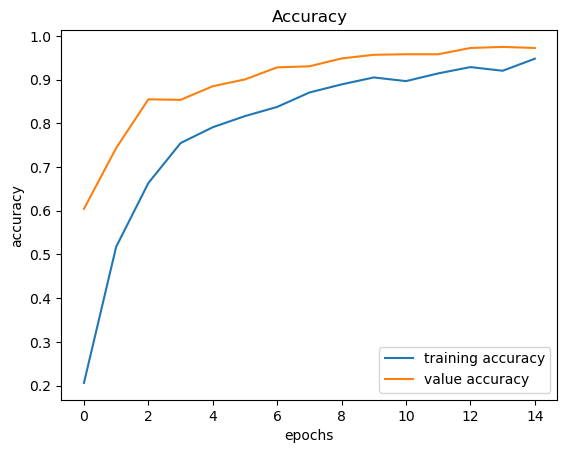

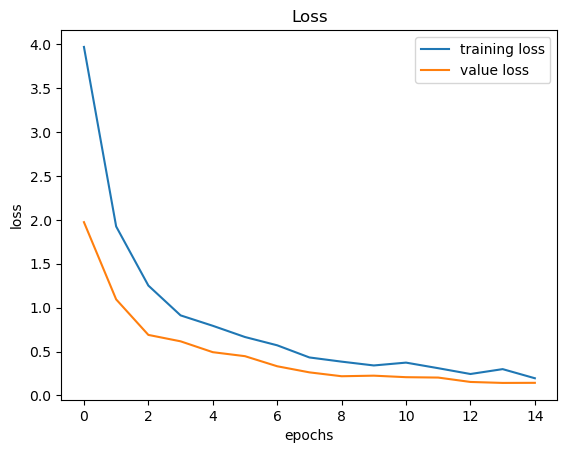

In [9]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='value accuracy')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'value loss')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('labels.csv')
labels = y_test["ClassId"].values
imgs = y_test["Name"].values



data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred=model.predict_classes(y_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

FileNotFoundError: [Errno 2] No such file or directory: 'Speed limit (5km/h)'

In [11]:
class_path = ('labels.csv')
classes = pd.read_csv(class_path)
class_names = list(classes['Name'])
print(class_names)

['Speed limit (5km/h)', 'Speed limit (15km/h)', 'Speed limit (30km/h)', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'speed limit (80km/h)', 'Dont Go straight or left', 'Dont Go straight or Right', 'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right', 'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car', 'No horn', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Go straight or right', 'Go straight', 'Go Left', 'Go Left or right', 'Go Right', 'keep Left', 'keep Right', 'Roundabout mandatory', 'watch out for cars', 'Horn', 'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals', 'Danger Ahead', 'Zebra Crossing', 'Bicycles crossing', 'Children crossing', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Unknown1', 'Unknown2', 'Unknown3', 'Go right or straight', 'Go left or straight', 'Unknown4', 'ZigZag Curve', 'Train Crossing', 'Under Construction', 'Unknown5', 'Fences', 'Heavy Vehicle Accidents'

In [12]:
print("Training Accuracy:")
print(history.history['accuracy'])
print("Value Accuracy:")
print(history.history['val_accuracy'])
print("Training Loss:")
print(history.history['loss'])
print("Value:")
print(history.history['val_loss'])

Training Accuracy:
[0.2059352546930313, 0.5173860788345337, 0.6633692979812622, 0.7547961473464966, 0.7910671234130859, 0.8165467381477356, 0.8375299572944641, 0.8705036044120789, 0.8890887498855591, 0.9049760103225708, 0.8965827226638794, 0.9142686128616333, 0.928657054901123, 0.9202637672424316, 0.9478417038917542]
Value Accuracy:
[0.6043165326118469, 0.743405282497406, 0.8549160957336426, 0.853717029094696, 0.8848921060562134, 0.9004796147346497, 0.9280575513839722, 0.9304556250572205, 0.9484412670135498, 0.9568345546722412, 0.958033561706543, 0.958033561706543, 0.9724220633506775, 0.9748201370239258, 0.9724220633506775]
Training Loss:
[3.9691123962402344, 1.924353003501892, 1.251317024230957, 0.9117461442947388, 0.7931339740753174, 0.6652020215988159, 0.5708592534065247, 0.43249449133872986, 0.3847865164279938, 0.3413975238800049, 0.3736535906791687, 0.3100428283214569, 0.24398162961006165, 0.2995549738407135, 0.19565853476524353]
Value:
[1.973288655281067, 1.093909502029419, 0.689

In [15]:
categorical_pred = np.argmax(model.predict(X_test), axis=1)
y_test_rounded = np.argmax(y_test, axis=1)

print ('Categorical Classification Model Results')
print (accuracy_score(y_test_rounded, categorical_pred))
print (classification_report(y_test_rounded, categorical_pred))

27/27 [==============================] - 1s 13ms/step


TypeError: '>' not supported between instances of 'str' and 'int'

In [13]:
classes

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [ ]:
import tkinter
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from tkinter import BOTTOM
from tkinter import Label
from tkinter import Button
from PIL import Image
from PIL import ImageTk
import numpy 
from keras.models import load_model
model = load_model('traffic_classifier.h5')

classes={1:'Speed limit (5km/h)',
         2:'Speed limit (15km/h)',
         3:'Speed limit (30km/h)', 
         4:'Speed limit (40km/h)',
         5:'Speed limit (50km/h)',
         6: 'Speed limit (60km/h)',
         7:'Speed limit (70km/h)',
         8: 'speed limit (80km/h)', 
         9:'Dont Go straight or left', 
        10:'Dont Go straight or Right',
        11:'Dont Go straight',
        12:'Dont Go Left',
        13:'Dont Go Left or Right',
        14:'Dont Go Right',
        15:'Dont overtake from Left',
        16:'No Uturn',
        17:'No Car',
        18:'No horn', 
        19:'Speed limit (40km/h)',
        20:'Speed limit (50km/h)',
        21: 'Go straight or right',
        22:'Go straight', 
        23:'Go Left',
        24:'Go Left or right',
        25:'Go Right',
        26:'keep Left',
        27:'keep Right',
        28:'Roundabout mandatory',
        29:'watch out for cars',
        30:'Horn',
        31:'Bicycles crossing', 
        32:'Uturn',
        33:'Road Divider',
        34:'Traffic signals',
        35:'Danger Ahead',
        36:'Zebra Crossing', 
        37:'Bicycles crossing',
        38:'Children crossing',
        39:'Dangerous curve to the left',
        40:'Dangerous curve to the right',
        41:'Unknown1',
        42:'Unknown2', 
        43:'Unknown3', 
        44:'Go right or straight',
        45:'Go left or straight',
        46:'Unknown4',
        47:'ZigZag Curve',
        48:'Train Crossing', 
        49:'Under Construction',
        50:'Unknown5', 
        51:'Fences', 
        52:'Heavy Vehicle Accidents', 
        53:'Unknown6',
        54: 'Give Way', 
        55:'No stopping', 
        56:'No entry', 
        57:'Unknown7',
        58:'Unknown8'}

top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    print(image.shape)
    pred = model.predict_classes([image])[0]
    sign=classes[pred+1]
    print(sign)
    label.configure(foreground='#011638',text=sign)
    
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image", command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()
top.mainloop()



(1, 30, 30, 3)


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\PC\.conda\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\PC\AppData\Local\Temp\ipykernel_7032\2525480921.py", line 94, in <lambda>
    classify_b=Button(top,text="Classify Image", command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\PC\AppData\Local\Temp\ipykernel_7032\2525480921.py", line 88, in classify
    pred = model.predict_classes([image])[0]
AttributeError: 'Sequential' object has no attribute 'predict_classes'
